In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

bitcoin_data = pd.read_csv('cryptocurrencypricehistory/bitcoin_dataset.csv', header = 0, parse_dates=['Date'])
bitcoin_data['Year'] = bitcoin_data['Date'].apply(lambda x: x.year)
bitcoin_data['Month'] = bitcoin_data['Date'].apply(lambda x: x.month)
bitcoin_data.head(3)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Year,Month
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0,2010,2
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0,2010,2
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0,2010,2


In [2]:
eth_data = pd.read_csv('cryptocurrencypricehistory/ethereum_dataset_mod.csv', header = 0, parse_dates=['Date(UTC)'])
eth_data['Year'] = eth_data['Date(UTC)'].apply(lambda x: x.year)
eth_data['Month'] = eth_data['Date(UTC)'].apply(lambda x: x.month)
eth_data = eth_data.sort_values('Date(UTC)')
eth_data.head(3)

,Date(UTC),UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register,Year,Month
0,2015-07-30,1438214400,0.0,8893,9205,7.204931e+07,0.0,11.5297,0.121,6912,1299,644,4.46,0,0,0,39316.09375,NaN,2015,7
1,2015-07-31,1438300800,0.0,0,9361,7.208550e+07,0.0,51.4594,0.603,6863,511,582,12.58,0,0,0,36191.71875,NaN,2015,7
2,2015-08-01,1438387200,0.0,0,9476,7.211320e+07,0.0,57.7845,0.887,5293,334,575,16.34,0,0,0,27705.93750,NaN,2015,8


In [3]:
ripple_data = pd.read_csv('cryptocurrencypricehistory/ripple_price.csv', header = 0, parse_dates=['Date'])
ripple_data['Year'] = ripple_data['Date'].apply(lambda x: x.year)
ripple_data['Month'] = ripple_data['Date'].apply(lambda x: x.month)
ripple_data = ripple_data.sort_values('Date')
ripple_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month
1661,2013-08-04,0.005874,0.005927,0.005874,0.005882,-,"45,921,000",2013,8
1660,2013-08-05,0.005875,0.005980,0.005613,0.005613,-,"45,928,400",2013,8
1659,2013-08-06,0.005637,0.005661,0.004629,0.004680,-,"44,067,600",2013,8
1658,2013-08-07,0.004669,0.004682,0.004333,0.004417,-,"36,503,500",2013,8
1657,2013-08-08,0.004397,0.004424,0.004175,0.004254,-,"34,372,500",2013,8


In [4]:
bitcoin_data.shape

(2920, 26)

In [5]:
eth_data.shape

(937, 20)

In [6]:
ripple_data.shape

(1662, 9)

Number of Bitcoin transactions per year

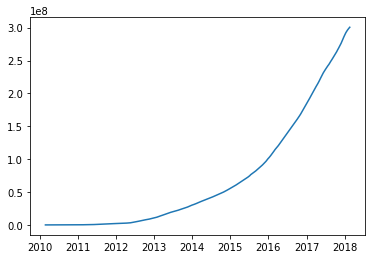

In [7]:
plt.plot(bitcoin_data['Date'], bitcoin_data['btc_n_transactions_total'])
plt.show()

In [8]:
bitcoin_data = bitcoin_data.loc[bitcoin_data['Date'] > datetime(2016,1,1)]
eth_data = eth_data.loc[eth_data['Date(UTC)'] > datetime(2016,1,1)]
ripple_data = ripple_data.loc[ripple_data['Date'] > datetime(2016,1,1)]

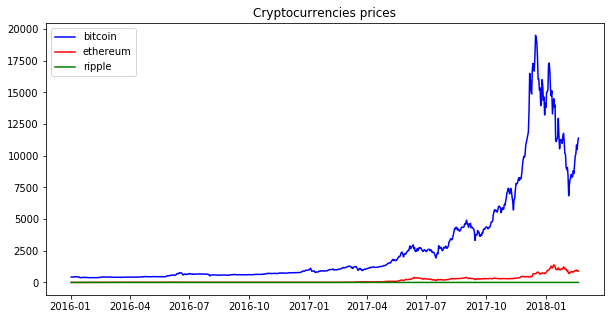

In [9]:
#plt.yscale('log')
plt.figure(figsize=(10,5))
plt.plot(bitcoin_data['Date'], bitcoin_data['btc_market_price'], c = 'blue', label = 'bitcoin')
plt.plot(eth_data['Date(UTC)'], eth_data['eth_etherprice'], c = 'red', label = 'ethereum')
plt.plot(ripple_data['Date'], ripple_data['Close'], c = 'green', label = 'ripple')
plt.title('Cryptocurrencies prices')
plt.legend()
plt.show()

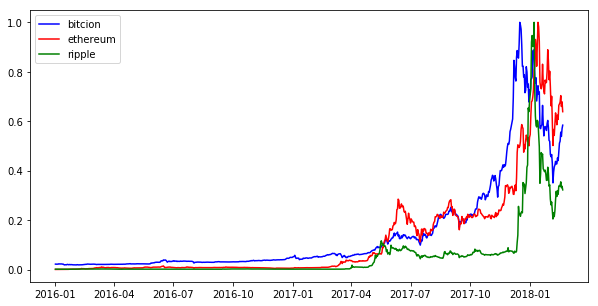

In [10]:
plt.figure(figsize=(10,5))
plt.plot(bitcoin_data['Date'], bitcoin_data['btc_market_price']/bitcoin_data['btc_market_price'].max(), c = 'blue', label = 'bitcion')
plt.plot(eth_data['Date(UTC)'], eth_data['eth_etherprice']/eth_data['eth_etherprice'].max(), c = 'red', label = 'ethereum')
plt.plot(ripple_data['Date'], ripple_data['Close']/ripple_data['Close'].max(), c = 'green', label = 'ripple')
plt.legend()
plt.show()

In [11]:
base_btc_price = bitcoin_data[bitcoin_data['Date'] == datetime(2016,1,2)]
base_btc_price = base_btc_price['btc_market_price']
base_eth_price = eth_data[eth_data['Date(UTC)'] == datetime(2016,1,2)]
base_eth_price = base_eth_price['eth_etherprice']
base_ripple_price = ripple_data[ripple_data['Date'] == datetime(2016,1,2)]
base_ripple_price = base_ripple_price['Close']

print float(base_btc_price), float(base_eth_price), float(base_ripple_price)

433.94 0.95 0.006065


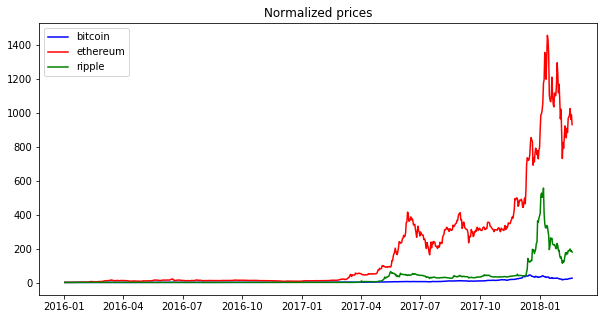

In [12]:
plt.figure(figsize=(10,5))
plt.plot(bitcoin_data['Date'], bitcoin_data['btc_market_price']/float(base_btc_price), c = 'blue', label = 'bitcoin')
plt.plot(eth_data['Date(UTC)'], eth_data['eth_etherprice']/float(base_eth_price), c = 'red', label = 'ethereum')
plt.plot(ripple_data['Date'], ripple_data['Close']/float(base_ripple_price), c = 'green', label = 'ripple')
plt.title('Normalized prices')
plt.legend()
plt.show()

In [13]:
eth_data[eth_data['Date(UTC)'] > datetime(2017,11,30)]

,Date(UTC),UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register,Year,Month
855,2017-12-01,1512086400,461.58,622720,12765900,9.607643e+07,44346.959035,125492.7020,1546.950,6127,882,18184,13.89,14561757161,6718817,31811531693,20476.68750,280.0,2017,12
856,2017-12-02,1512172800,457.96,627785,12861547,9.609664e+07,44008.415523,125605.2762,1570.293,6053,858,17954,14.07,13179215357,6720306,30183667434,20205.18750,200.0,2017,12
857,2017-12-03,1512259200,462.81,693808,12965590,9.611697e+07,44483.896158,121828.5383,1509.751,6029,943,19326,14.08,14068434201,6721650,33003047721,20336.53125,330.0,2017,12
858,2017-12-04,1512345600,466.93,701834,13091051,9.613740e+07,44889.436634,125869.5928,1530.846,5671,1433,19741,14.86,21962218932,6722294,34887121288,20428.21875,194.0,2017,12
859,2017-12-05,1512432000,453.96,693090,13208395,9.615804e+07,43651.902831,123432.1491,1477.492,5588,1630,19800,14.94,30921177676,6726859,35038771633,20636.81250,135.0,2017,12
860,2017-12-06,1512518400,422.48,791746,13403976,9.617868e+07,40633.568304,123628.5175,1468.450,5473,1801,21174,15.36,42116421717,6722801,33872524569,20641.21875,42.0,2017,12
861,2017-12-07,1512604800,421.15,659068,13563836,9.619959e+07,40514.455328,125209.8857,1480.719,5798,1508,17899,14.57,59656597683,6730260,37125990058,20906.25000,144.0,2017,12
862,2017-12-08,0,453.06,0,0,0.000000e+00,0.000000,0.0000,0.000,0,0,0,0.00,0,0,0,0.00000,0.0,2017,12
863,2017-12-09,0,473.50,0,0,0.000000e+00,0.000000,0.0000,0.000,0,0,0,0.00,0,0,0,0.00000,0.0,2017,12
864,2017-12-10,0,441.72,0,0,0.000000e+00,0.000000,0.0000,0.000,0,0,0,0.00,0,0,0,0.00000,0.0,2017,12


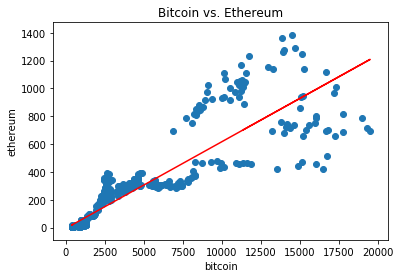

In [14]:
fit = np.polyfit(bitcoin_data['btc_market_price'], eth_data['eth_etherprice'], deg=1)
plt.plot(bitcoin_data['btc_market_price'], fit[0] * bitcoin_data['btc_market_price'] + fit[1], color='red')
plt.scatter(bitcoin_data['btc_market_price'], eth_data['eth_etherprice'])
plt.title('Bitcoin vs. Ethereum')
plt.xlabel("bitcoin")
plt.ylabel("ethereum")
plt.show()

In [15]:
np.corrcoef(bitcoin_data['btc_market_price'],eth_data['eth_etherprice'])

array([[ 1.        ,  0.90037404],
       [ 0.90037404,  1.        ]])

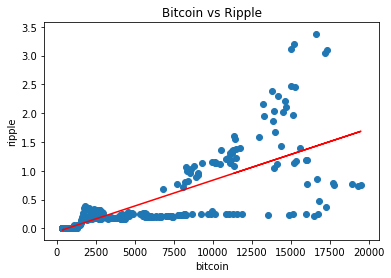

In [16]:
fit = np.polyfit(bitcoin_data['btc_market_price'], ripple_data['Close'], deg=1)
plt.plot(bitcoin_data['btc_market_price'], fit[0] * bitcoin_data['btc_market_price'] + fit[1], color='red')
plt.scatter(bitcoin_data['btc_market_price'], ripple_data['Close'])
plt.title('Bitcoin vs Ripple')
plt.xlabel("bitcoin")
plt.ylabel("ripple")
plt.show()

In [17]:
np.corrcoef(bitcoin_data['btc_market_price'],ripple_data['Close'])

array([[ 1.        ,  0.80102856],
       [ 0.80102856,  1.        ]])

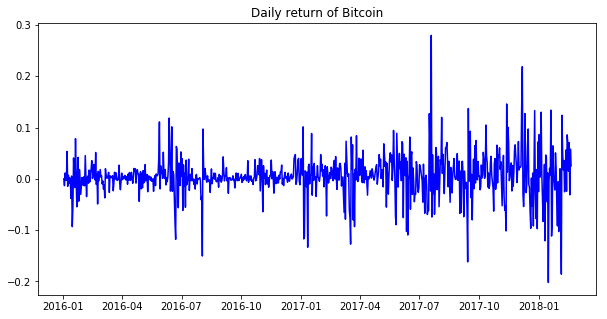

In [18]:
btc_daily_return = []
for i,f in enumerate(bitcoin_data['btc_market_price']):
    if i != 0:
        ret = (bitcoin_data['btc_market_price'].iloc[i] - bitcoin_data['btc_market_price'].iloc[i-1])/bitcoin_data['btc_market_price'].iloc[i-1]
    else:
        ret = 0
    btc_daily_return.append(ret)

plt.figure(figsize=(10,5))
plt.title('Daily return of Bitcoin')
plt.plot(bitcoin_data['Date'], btc_daily_return, c = 'blue')
plt.show()

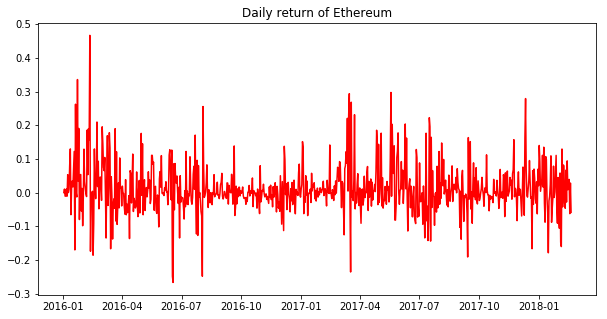

In [19]:
eth_daily_return = []
for i,f in enumerate(eth_data['eth_etherprice']):
    if i != 0:
        ret = (eth_data['eth_etherprice'].iloc[i] - eth_data['eth_etherprice'].iloc[i-1])/eth_data['eth_etherprice'].iloc[i-1]
    else:
        ret = 0
    eth_daily_return.append(ret)

plt.figure(figsize=(10,5))
plt.title('Daily return of Ethereum')
plt.plot(eth_data['Date(UTC)'], eth_daily_return, c = 'red')
plt.show()

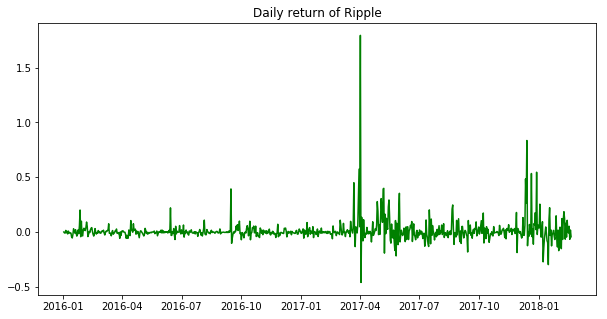

In [20]:
rip_daily_return = []
for i,f in enumerate(ripple_data['Close']):
    if i != 0:
        ret = (ripple_data['Close'].iloc[i] - ripple_data['Close'].iloc[i-1])/ripple_data['Close'].iloc[i-1]
    else:
        ret = 0
    rip_daily_return.append(ret)

plt.figure(figsize=(10,5))
plt.title('Daily return of Ripple')
plt.plot(bitcoin_data['Date'], rip_daily_return, c = 'green')
plt.show()

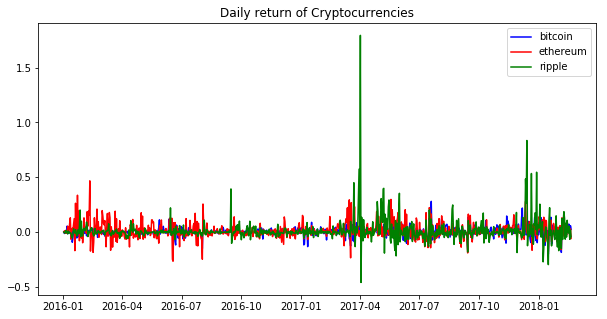

In [21]:
plt.figure(figsize=(10,5))
plt.title('Daily return of Cryptocurrencies')
plt.plot(bitcoin_data['Date'], btc_daily_return, c = 'blue', label = 'bitcoin')
plt.plot(eth_data['Date(UTC)'], eth_daily_return, c = 'red', label = 'ethereum')
plt.plot(bitcoin_data['Date'], rip_daily_return, c = 'green', label = 'ripple')
plt.legend()
plt.show()